In [2]:
from typing import TypedDict, List, Union
from langchain_ollama import ChatOllama
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage

In [3]:
llm = ChatOllama(model='qwen2.5')

In [4]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

In [5]:
def llm_node(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    state["messages"].append(AIMessage(response.content))
    print(f" AI : {response.content}")
    return state

In [6]:
graph = StateGraph(AgentState)
graph.add_node("llm", llm_node)

graph.add_edge(START, "llm")
graph.add_edge("llm", END)
agent = graph.compile()

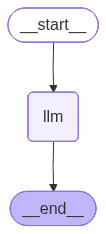

In [7]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [8]:
memory = []
user_input = input("Human: ")
while user_input != "quit":
    memory.append(HumanMessage(user_input))
    final_state = agent.invoke({"messages": memory})
    memory = final_state["messages"]
    user_input = input("Human: ")

Human:  hi, my name is ali


 AI : Hello Ali! Nice to meet you. How can I assist you today? Do you have any specific questions or topics you'd like to discuss?


Human:  what is my name?


 AI : Your name is Ali. How can I help you with that, Ali? Is there anything else you'd like to know or discuss?


Human:  quit


In [9]:
with open("history.txt", "w") as file:
    for message in memory:
        if isinstance(message, HumanMessage):
            file.write(f"Human:{message.content}\n")
        elif isinstance(message, AIMessage):
            file.write(f"AI:{message.content}\n\n")

print("History saved in history.txt")

History saved in history.txt


In [27]:
# Load history
history = []
with open("history.txt", "r") as file:
    for line in file:
        line = line.strip()
        if line.startswith("Human:"):
            history.append(HumanMessage(line[6:]))
        elif line.startswith("AI:"):
            history.append(AIMessage(line[3:]))

print("History loaded...")

History loaded...


In [28]:
history = history[-4:]

In [29]:
print(history)

[HumanMessage(content='hi, my name is ali', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello Ali! Nice to meet you. How can I assist you today? Do you have any specific questions or topics you'd like to discuss?", additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="Your name is Ali. How can I help you with that, Ali? Is there anything else you'd like to know or discuss?", additional_kwargs={}, response_metadata={})]


In [30]:
user_input = input("Human: ")
while user_input != "quit":
    history.append(HumanMessage(user_input))
    final_state = agent.invoke({"messages": history})
    history = final_state["messages"]
    user_input = input("Human: ")

Human:  what is my name?


 AI : Your name is Ali. If you have any other questions or need assistance with something, feel free to ask!


Human:  quit


In [31]:
print(history)

[HumanMessage(content='hi, my name is ali', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello Ali! Nice to meet you. How can I assist you today? Do you have any specific questions or topics you'd like to discuss?", additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="Your name is Ali. How can I help you with that, Ali? Is there anything else you'd like to know or discuss?", additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content='Your name is Ali. If you have any other questions or need assistance with something, feel free to ask!', additional_kwargs={}, response_metadata={})]
